In [45]:
import pandas as pd
from os import listdir
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:

dir = listdir("../Bases/")

df2 = pd.DataFrame([])
for file in dir:
    if ".json" in file:
        mes = pd.read_json(f"../Bases/{file}")
        print(len(mes.index))
        df2 = pd.concat([df2,mes])

223402
233772
209239
230499
237584
204593
232717
220745
220367
243402
221609


In [4]:
df = df2.copy()
df.drop(df.loc[df['Linha'].isin(['608','606','310','7220'])].index,inplace=True)

In [5]:
df.loc[df['Linha'].isin(['608','606','310','7220'])]

,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc


In [6]:
# Função para converter o tempo em segundos
def time_to_seconds(time_str):
    time_obj = dt.datetime.strptime(time_str, "%H:%M:%S")
    timedelta_obj = dt.timedelta(hours=time_obj.hour, minutes=time_obj.minute, seconds=time_obj.second)
    return timedelta_obj.total_seconds()

# Aplicar a função à coluna 'Time' e criar uma nova coluna 'Seconds'
df['Segundos'] = df['DuraçãoViagem'].apply(time_to_seconds)

df.drop(df[df["Segundos"] == 0].index, inplace=True)

In [7]:
linhas = df['Linha'].unique()

In [8]:
def outlier_metric(valores):
    Q1 = np.percentile(valores,25)
    Q3 = np.percentile(valores,75)
    intervalo = Q3-Q1
    limite_superior = Q3+intervalo*1.5
    limite_inferior = Q1-intervalo*1.5
    return limite_superior,limite_inferior

In [9]:
aux_list = []
for linha in linhas:
    rota = df.loc[df['Linha'] == linha]
    limite_superior,limite_inferior = outlier_metric(rota['Segundos'])
    rota = rota.loc[(rota['Segundos'] < limite_superior) & (rota['Segundos'] > limite_inferior)]
    aux = {
        'linha': linha,
        'desvio':rota['Segundos'].std(),
        'tamanho': len(rota)
    }
    aux_list.append(aux)

In [10]:
df3 = pd.DataFrame(aux_list)
df3.drop(df3.loc[df3['tamanho']<8000].index,inplace=True)
df3 = df3.sort_values('desvio').reset_index()
df3

,index,linha,desvio,tamanho
0,70,270,163.840931,13505
1,75,277,189.543764,14278
2,71,271,198.916177,10555
3,30,169,205.986173,12365
4,72,272,211.250899,14534
...,...,...,...,...
85,178,137,744.435672,11715
86,197,M233,778.943588,35571
87,23,136,785.559007,11151
88,22,135,810.399772,10909


In [11]:
rotas = ["270", "277", "135", "138"]

for num_rota in rotas:
    rota = df.loc[df['Linha'] == num_rota]
    limite_superior,limite_inferior = outlier_metric(rota['Segundos'])
    rota = rota.loc[(rota['Segundos'] < limite_superior) & (rota['Segundos'] > limite_inferior)]

    # rota.to_csv(f"../Raw/rota{num_rota}FL.csv")

{'whiskers': [<matplotlib.lines.Line2D at 0x1e824eaf490>,
 'caps': [<matplotlib.lines.Line2D at 0x1e824eaf9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e823265f00>],
 'medians': [<matplotlib.lines.Line2D at 0x1e824eafdf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e824f3c0d0>],
 'means': []}

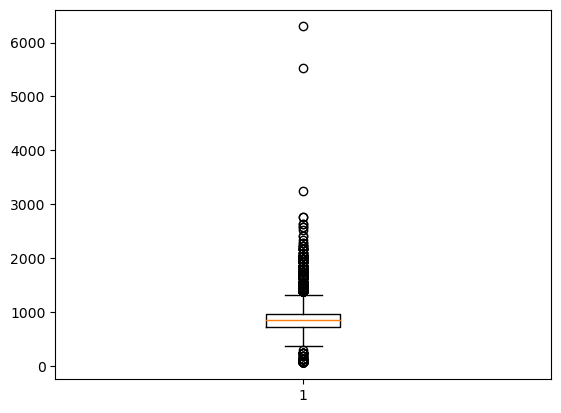

In [38]:

plt.boxplot(rota['Segundos'])

In [39]:
rota["DataIni"] = pd.to_datetime(rota["DataIni"], unit="ms")
rota["DataIni"]

rota["HoraIni"] = pd.to_datetime(rota["HoraIni"]).dt.time
rota["HoraIni"]

C:\Users\leovi\AppData\Local\Temp\ipykernel_14408\3144241141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rota["DataIni"] = pd.to_datetime(rota["DataIni"], unit="ms")
C:\Users\leovi\AppData\Local\Temp\ipykernel_14408\3144241141.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rota["HoraIni"] = pd.to_datetime(rota["HoraIni"]).dt.time


85289    05:59:00
85290    06:31:00
85292    07:00:00
85297    09:26:00
85298    10:54:00
           ...   
86367    13:37:00
86368    15:37:00
86369    17:18:00
86370    18:44:00
86372    22:53:00
Name: HoraIni, Length: 14351, dtype: object

C:\Users\leovi\AppData\Local\Temp\ipykernel_14408\4244547313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rota['DataInicio'] = rota.apply(lambda x: dt.datetime.combine(x['DataIni'],x['HoraIni']),axis=1)
C:\Users\leovi\AppData\Local\Temp\ipykernel_14408\4244547313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rota["DataInicio"] = pd.to_datetime(rota["DataInicio"])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is c

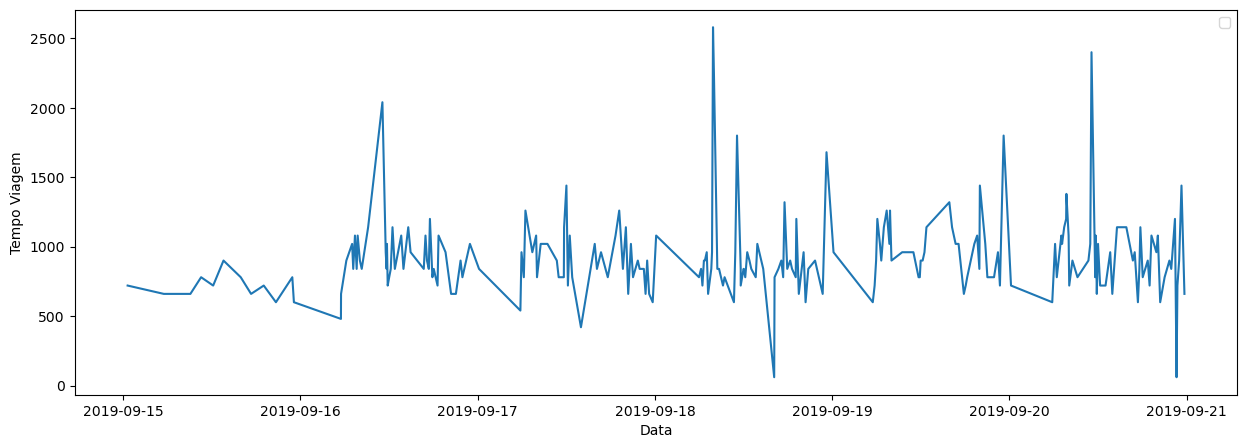

In [40]:
rota['DataInicio'] = rota.apply(lambda x: dt.datetime.combine(x['DataIni'],x['HoraIni']),axis=1)

rota["DataInicio"] = pd.to_datetime(rota["DataInicio"])
rota = rota.sort_values(by=["DataInicio"], ascending=False)

plt.figure(figsize=(15, 5))

plt.xlabel("Data")
plt.ylabel("Tempo Viagem")

rota = rota[(rota["DataInicio"] > "2019-09-15") & (rota["DataInicio"] < "2019-09-21")]


plt.plot(rota["DataInicio"], rota["Segundos"], color="#1f77b4")


plt.legend()
plt.show()

In [41]:
rota[(rota["DataIni"] == "2019-09-16")]

,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc,Segundos,DataInicio
85957,2019-09-16,22:57:00,1568592000000,23:14:00,Volta,270,11575,00:17:00,0,5.231,1020.0,2019-09-16 22:57:00
85086,2019-09-16,21:56:00,1568592000000,22:09:00,Ida,270,11571,00:13:00,4,5.040,780.0,2019-09-16 21:56:00
85955,2019-09-16,21:41:00,1568592000000,21:56:00,Volta,270,11571,00:15:00,4,5.231,900.0,2019-09-16 21:41:00
85085,2019-09-16,21:03:00,1568592000000,21:14:00,Ida,270,11569,00:11:00,1,5.040,660.0,2019-09-16 21:03:00
85084,2019-09-16,20:24:00,1568592000000,20:35:00,Ida,270,11659,00:11:00,2,5.040,660.0,2019-09-16 20:24:00
85952,2019-09-16,19:39:00,1568592000000,19:55:00,Volta,270,1483,00:16:00,0,5.231,960.0,2019-09-16 19:39:00
85950,2019-09-16,18:42:00,1568592000000,19:00:00,Volta,270,1457,00:18:00,2,5.231,1080.0,2019-09-16 18:42:00
85080,2019-09-16,18:34:00,1568592000000,18:46:00,Ida,270,11651,00:12:00,19,5.040,720.0,2019-09-16 18:34:00
85079,2019-09-16,18:03:00,1568592000000,18:17:00,Ida,270,11603,00:14:00,13,5.040,840.0,2019-09-16 18:03:00
85078,2019-09-16,17:52:00,1568592000000,18:05:00,Ida,270,11657,00:13:00,15,5.040,780.0,2019-09-16 17:52:00


In [42]:
def outlier_metric2(valores):
    Q1 = np.percentile(valores,25)
    Q3 = np.percentile(valores,75)
    intervalo = Q3-Q1
    limite_superior = Q3+intervalo*1.5
    limite_inferior = Q1-intervalo*1.5
    return Q1,Q3,intervalo,limite_superior,limite_inferior
v = outlier_metric2(rota['Segundos'])
v


(780.0, 1020.0, 240.0, 1380.0, 420.0)

In [43]:
rota.loc[rota['Segundos']>1320]

,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc,Segundos,DataInicio
85818,2019-09-20,23:18:00,1568937600000,23:42:00,Volta,270,11599,00:24:00,0,5.231,1440.0,2019-09-20 23:18:00
85795,2019-09-20,11:07:00,1568937600000,11:47:00,Volta,270,11603,00:40:00,2,5.231,2400.0,2019-09-20 11:07:00
85791,2019-09-20,07:43:00,1568937600000,08:06:00,Volta,270,1533,00:23:00,4,5.231,1380.0,2019-09-20 07:43:00
85852,2019-09-19,23:13:00,1568851200000,23:43:00,Volta,270,1531,00:30:00,0,5.231,1800.0,2019-09-19 23:13:00
85847,2019-09-19,20:00:00,1568851200000,20:24:00,Volta,270,1421,00:24:00,0,5.231,1440.0,2019-09-19 20:00:00
85886,2019-09-18,23:14:00,1568764800000,23:42:00,Volta,270,11599,00:28:00,0,5.231,1680.0,2019-09-18 23:14:00
85864,2019-09-18,11:07:00,1568764800000,11:37:00,Volta,270,11603,00:30:00,1,5.231,1800.0,2019-09-18 11:07:00
84989,2019-09-18,08:00:00,1568764800000,08:37:00,Ida,270,1475,00:37:00,5,5.040,2220.0,2019-09-18 08:00:00
84988,2019-09-18,07:52:00,1568764800000,08:35:00,Ida,270,11619,00:43:00,46,5.040,2580.0,2019-09-18 07:52:00
85032,2019-09-17,12:01:00,1568678400000,12:25:00,Ida,270,1537,00:24:00,112,5.040,1440.0,2019-09-17 12:01:00


In [44]:
rota['Segundos'].mean()

919.6412556053812

In [88]:
dateparse = lambda dates: dt.datetime.strptime(str(dates).split(" ")[0], '%Y-%m-%d')
base = pd.read_csv(f"../Clean/rota270FL_Full.csv", parse_dates = ['data_partida'],
                   index_col = 'data_partida')

base = base.asfreq('M')

C:\Users\leovi\AppData\Local\Temp\ipykernel_14408\2381710617.py:5: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  base = base.asfreq('M')


ValueError: cannot reindex on an axis with duplicate labels

In [87]:
base.index

DatetimeIndex(['2019-04-30 12:18:00', '2019-04-30 12:46:00',
               '2019-04-30 13:06:00', '2019-04-30 13:56:00',
               '2019-04-30 14:56:00', '2019-04-30 16:08:00',
               '2019-04-30 17:00:00', '2019-04-30 17:23:00',
               '2019-04-30 17:52:00', '2019-04-30 18:05:00',
               ...
               '2019-09-02 22:55:00', '2019-09-01 06:18:00',
               '2019-09-01 08:55:00', '2019-09-01 10:33:00',
               '2019-09-01 11:57:00', '2019-09-01 13:37:00',
               '2019-09-01 15:37:00', '2019-09-01 17:18:00',
               '2019-09-01 18:44:00', '2019-09-01 22:53:00'],
              dtype='datetime64[ns]', name='data_partida', length=13502, freq=None)

In [82]:
decomposition = seasonal_decompose(base['tempo_viagem'])

# Obter as componentes da decomposição
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotar as componentes da decomposição
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(base.index, base['tempo_viagem'], label='Original')
plt.legend(loc='best')
plt.subplot(4, 1, 2)
plt.plot(base.index, trend, label='Tendência')
plt.legend(loc='best')
plt.subplot(4, 1, 3)
plt.plot(base.index, seasonal, label='Sazonalidade')
plt.legend(loc='best')
plt.subplot(4, 1, 4)
plt.plot(base.index, residual, label='Resíduo')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None